# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
中外薬
キーエンス
ＮＴＴ
任天堂
三井住友ＦＧ
ＫＤＤＩ
リクルート
伊藤忠
ＳＢ
東京海上
三菱商
ＳＢＧ
東エレク
三菱重
みずほＦＧ
ＪＴ
三井物
信越化
ホンダ
武田
第一三共
富士通
ＯＬＣ
キヤノン
ＨＯＹＡ
['7203', '6758', '8306', '6501', '9983', '4519', '6861', '9432', '7974', '8316', '9433', '6098', '8001', '9434', '8766', '8058', '9984', '8035', '7011', '8411', '2914', '8031', '4063', '7267', '4502', '4568', '6702', '4661', '7751', '7741']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,4519,6861,9432,7974,8316,...,2914,8031,4063,7267,4502,4568,6702,4661,7751,7741
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.983236,0.988840,0.984000,0.969175,0.992379,...,0.972455,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.998713,0.984179,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.999574,0.988193,0.983333,0.975975,0.980088,...,0.990419,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,1.002575,0.994658,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,1.007387,0.993692,0.992000,1.027199,0.985988,...,0.993772,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996138,0.996507,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,1.000426,0.973799,0.994573,0.989588,0.982036,...,1.005749,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.984516,0.989727,0.991806
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.965904,0.945819,0.981683,0.923372,0.946856,...,0.985389,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.950000,0.954387,0.948290
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.964342,0.936115,0.980326,0.932049,0.934132,...,0.995928,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.943226,0.965276,0.931619
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935502,0.935145,0.968114,0.951685,0.918413,...,0.986826,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.924677,0.964660,0.930206
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.941611,0.898916,0.966757,0.920632,0.847804,...,0.969581,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.919355,0.916992,0.887821
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.945305,0.884522,0.977612,0.911225,0.779691,...,0.973892,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.941290,0.880214,0.883865


In [7]:
summary

,7203,6758,8306,6501,9983,4519,6861,9432,7974,8316,...,2914,8031,4063,7267,4502,4568,6702,4661,7751,7741
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.983236,0.988840,0.984000,0.969175,0.992379,...,0.972455,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.998713,0.984179,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.999574,0.988193,0.983333,0.975975,0.980088,...,0.990419,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,1.002575,0.994658,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,1.007387,0.993692,0.992000,1.027199,0.985988,...,0.993772,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996138,0.996507,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,1.000426,0.973799,0.994573,0.989588,0.982036,...,1.005749,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.984516,0.989727,0.991806
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.965904,0.945819,0.981683,0.923372,0.946856,...,0.985389,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.950000,0.954387,0.948290
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.964342,0.936115,0.980326,0.932049,0.934132,...,0.995928,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.943226,0.965276,0.931619
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935502,0.935145,0.968114,0.951685,0.918413,...,0.986826,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.924677,0.964660,0.930206
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.941611,0.898916,0.966757,0.920632,0.847804,...,0.969581,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.919355,0.916992,0.887821
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.945305,0.884522,0.977612,0.911225,0.779691,...,0.973892,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.941290,0.880214,0.883865


In [8]:
df_ranking = summary.tail(1).iloc[0].sort_values(ascending=False)
df_ranking

4519    1.180992
9433    1.071265
2914    1.020838
9432    1.016961
9434    1.011759
4661    1.007742
9983    0.987957
7267    0.974684
8001    0.967399
4502    0.962399
7011    0.951637
6702    0.932481
7974    0.929309
6861    0.926411
8058    0.918786
6501    0.900214
8031    0.896911
7203    0.885010
7741    0.881605
4568    0.872134
6758    0.868899
8035    0.860476
8766    0.860388
7751    0.852681
6098    0.848141
4063    0.833706
9984    0.832375
8316    0.784182
8411    0.752661
8306    0.749598
Name: 2025-04-22 00:00:00, dtype: float64

In [13]:
list_ranking = df_ranking.index[0:6]
for code in list_ranking:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-18    1.183123
2025-04-21    1.196193
2025-04-22    1.180992
Name: Close, dtype: float64

9433 KDDI Corporation
2025-04-18    1.064805
2025-04-21    1.056470
2025-04-22    1.071265
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-18    1.017964
2025-04-21    1.015569
2025-04-22    1.020838
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-18    1.019674
2025-04-21    1.007463
2025-04-22    1.016961
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-18    1.028222
2025-04-21    1.007996
2025-04-22    1.011759
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-18    0.991290
2025-04-21    1.006129
2025-04-22    1.007742
Name: Close, dtype: float64

Median
2025-04-18    0.912590
2025-04-21    0.902038
2025-04-22    0.909500
dtype: float64


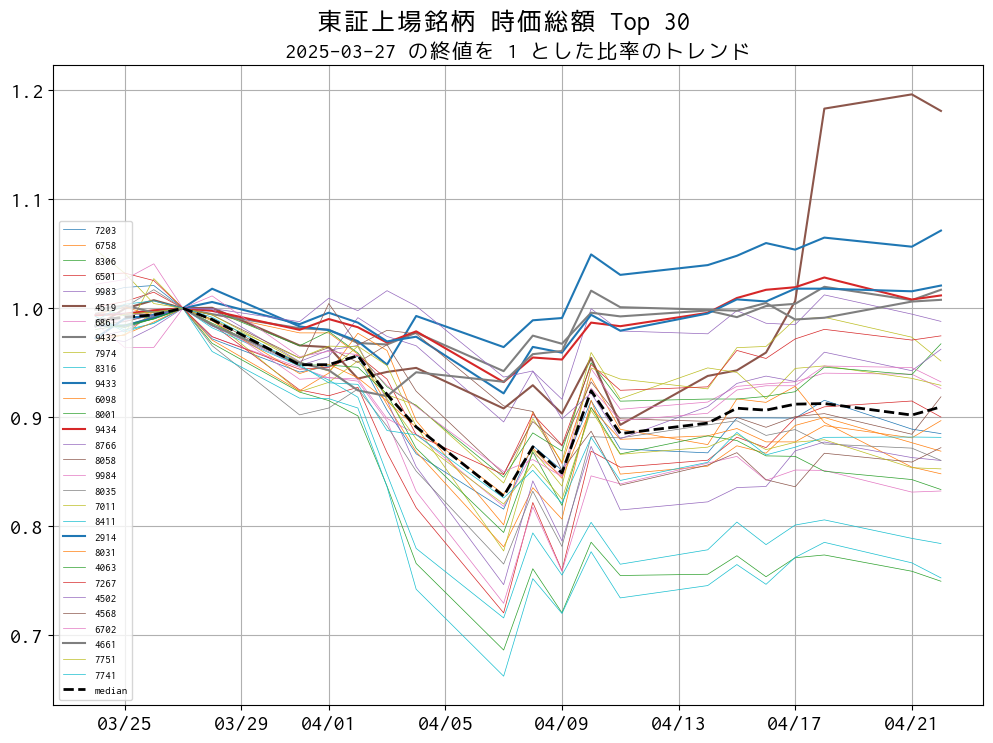

In [14]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    if colname in list_ranking:
        width = 1.5
        lstyle = 'solid'
    else:
        width = 0.5
        lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()